# XGBoost - Breast Canser (Classification)

[ch9-kaggle-winners.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch9-kaggle-winners.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
from sklearn.datasets import load_breast_cancer

## Define Feature and Target

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [6]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
pd.DataFrame(X).isna().sum().sum()

0

In [8]:
pd.DataFrame(y).value_counts()

1    357
0    212
dtype: int64

## Classification Model Selection

In [9]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [10]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

[23:26:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [11]:
cross_validation(XGBClassifier(booster='gblinear'))

Cross Validation:
Elased time: 0.17s
Accuracy: [0.97 0.96 0.96 0.97 0.98]
Avg. Accuracy: 0.97


In [12]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

Cross Validation:
Elased time: 3.73s
Accuracy: [0.96 0.96 0.99 0.97 0.97]
Avg. Accuracy: 0.97


In [13]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 0.46s
Accuracy: [0.94 0.95 0.98 0.97 0.97]
Avg. Accuracy: 0.96


## HPO

### Default

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Utility function to estimate accuracy scores
def model_estimation(model):    
    start = time.time()
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))
    print('Elapsed time: %0.2fs' % (time.time()-start)) 
    
    return accuracy_score(y_test,y_pred)

In [15]:
# default model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

best_score = model_estimation(model)
best_model = model

print('\nbest_score: %0.3f' % (best_score))


Confusion Matrix:
[[54  2]
 [ 5 82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.98      0.94      0.96        87

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score: 0.95
Precision Score: 0.98
Recall Score: 0.94
F1 Score: 0.96
Elapsed time: 0.00s

best_score: 0.951


In [16]:
# learning_rate_values
param = 'learning_rate_values'
values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(learning_rate=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
learning_rate_values = values[best_param]

Accuracy Score: 0.93
Accuracy Score: 0.92
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.94

Elased time: 0.91s
best param:  0.2


In [17]:
# max_depth
param = 'max_depth'
values = [1, 2, 3, 5, 6, 8]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(max_depth=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
max_depth = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.96
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.39s
best param:  3


In [18]:
# gamma
param = 'gamma'
values = [0, 0.01, 0.1, 0.5, 1, 2]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(gamma=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
gamma = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.93

Elased time: 0.57s
best param:  0


In [19]:
# min_child_weight
param = 'min_child_weight'
values = [1, 2, 3, 4, 5]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(min_child_weight=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
min_child_weight = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.94
Accuracy Score: 0.94
Accuracy Score: 0.96
Accuracy Score: 0.94

Elased time: 0.30s
best param:  4


In [20]:
# subsample
param = 'subsample'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(subsample=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
subsample = values[best_param]

Accuracy Score: 0.97
Accuracy Score: 0.96
Accuracy Score: 0.97
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.35s
best param:  0.5


In [21]:
# colsample_bytree
param = 'colsample_bytree'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(colsample_bytree=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
colsample_bytree = values[best_param]

Accuracy Score: 0.95
Accuracy Score: 0.96
Accuracy Score: 0.97
Accuracy Score: 0.96
Accuracy Score: 0.95

Elased time: 0.43s
best param:  0.8


In [22]:
# n_estimators
param = 'n_estimators'
values = [50, 100, 200, 400, 800]
best_param = 0
best_score = 0
cnt = 0
start = time.time()

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(n_estimators=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best param: ', values[best_param])
n_estimators = values[best_param]

Accuracy Score: 0.94
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95
Accuracy Score: 0.95

Elased time: 0.73s
best param:  100


In [23]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    print("best parameter:", rand_clf.best_params_)    
    print("best score: {:.3f}".format(rand_clf.best_score_))

    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [25]:
import time
start = time.time()

randomized_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 0.7, 1, 2],
        'min_child_weight':[5, 10, 15, 20, 30],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.2, 0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}
best score: 0.958
Model with rank: 1
Mean validation score: 0.958 (std: 0.018)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}

Model with rank: 2
Mean validation score: 0.955 (std: 0.009)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.8, 'gamma': 0.01, 'colsample_bytree': 0.5}

Model with rank: 3
Mean validation score: 0.953 (std: 0.015)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5}

Model with rank: 3
Mean validation score: 0.953 (std: 0.013)
Parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.2, 'gamma':

In [26]:
print(best_model.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 0}


## HPO: Bayesian Optimization 

In [27]:
from bayes_opt import BayesianOptimization

def xgbc_cv(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, ):
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(n_estimators),
                        learning_rate=learning_rate,
                        max_depth=int(max_depth),
                        gamma=gamma,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

    xgb.fit(X_train, y_train)    

    y_pred = xgb.predict(X_test)

    score = accuracy_score(y_pred, y_test)

    print('score=', score)

    return score

hyperparameter_space = {
    'n_estimators': (50, 800),
    'learning_rate': (0.01, 1.0),
    'max_depth': (1, 8),
    'gamma' : (0.01, 1),
    'min_child_weight': (1, 20),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

optimizer = BayesianOptimization(f=xgbc_cv, pbounds=hyperparameter_space, random_state=2, verbose=0)

#gp_params = {"alpha": 1e-10}
#optimizer.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)    

#optimizer.maximize(init_points=2, n_iter=10)
optimizer.maximize(init_points=3, n_iter=5, acq='ei')


optimizer.max

score= 0.9440559440559441
score= 0.9300699300699301
score= 0.8881118881118881
score= 0.9370629370629371
score= 0.9370629370629371
score= 0.9090909090909091
score= 0.9300699300699301
score= 0.8811188811188811


{'target': 0.9440559440559441,
 'params': {'colsample_bytree': 0.49239541192780345,
  'gamma': 0.03566696950961242,
  'learning_rate': 0.5541658530999221,
  'max_depth': 4.047256748327938,
  'min_child_weight': 8.986988239662292,
  'n_estimators': 297.7511157529056,
  'subsample': 0.6023243170189212}}

In [28]:
best_params = optimizer.max['params']

In [29]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(best_params['n_estimators']), 
                        learning_rate=best_params['learning_rate'], 
                        max_depth=int(best_params['max_depth']), 
                        gamma=best_params['gamma'], 
                        min_child_weight=int(best_params['min_child_weight']), 
                        subsample=best_params['subsample'], 
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('score=', score)     

if(score > best_score): 
    best_score = score
    best_model = model
    
    best_score = model_estimation(model)
    print('\nbest_score: %0.3f' % (best_score))

score= 0.9300699300699301


## Evaluation

In [30]:
cross_validation(best_model)   
model_estimation(best_model)    

Cross Validation:
Elased time: 0.39s
Accuracy: [0.97 0.96 0.99 0.98 0.98]
Avg. Accuracy: 0.98

Confusion Matrix:
[[54  2]
 [ 5 82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.98      0.94      0.96        87

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score: 0.95
Precision Score: 0.98
Recall Score: 0.94
F1 Score: 0.96
Elapsed time: 0.00s


0.951048951048951

## Feature Importances

Feature Importances:
[1.0654748e-02 1.3210458e-02 6.8235531e-05 1.9150659e-03 1.3972239e-02
 8.4472802e-03 0.0000000e+00 8.2345687e-02 8.7148324e-04 0.0000000e+00
 5.4117199e-03 1.6653186e-02 1.1921781e-02 8.5804798e-03 5.2278810e-03
 7.3434697e-03 4.3847822e-04 5.5555068e-03 4.9388194e-03 7.6386826e-03
 1.6537522e-01 2.1876246e-02 4.4071048e-01 6.7770727e-02 1.1441135e-02
 1.7983301e-03 1.0695444e-02 6.3925333e-02 2.6674785e-03 8.5443370e-03]
You should consider upgrading via the '/Users/ksdyb/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


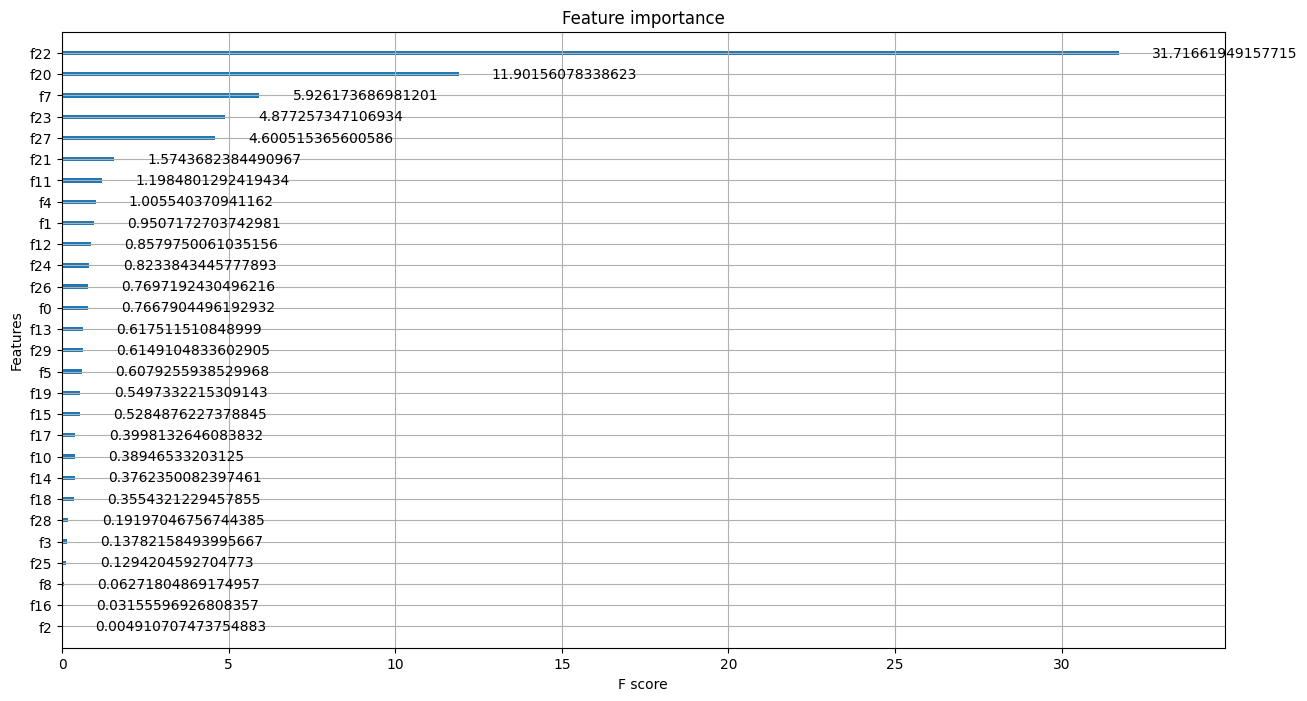

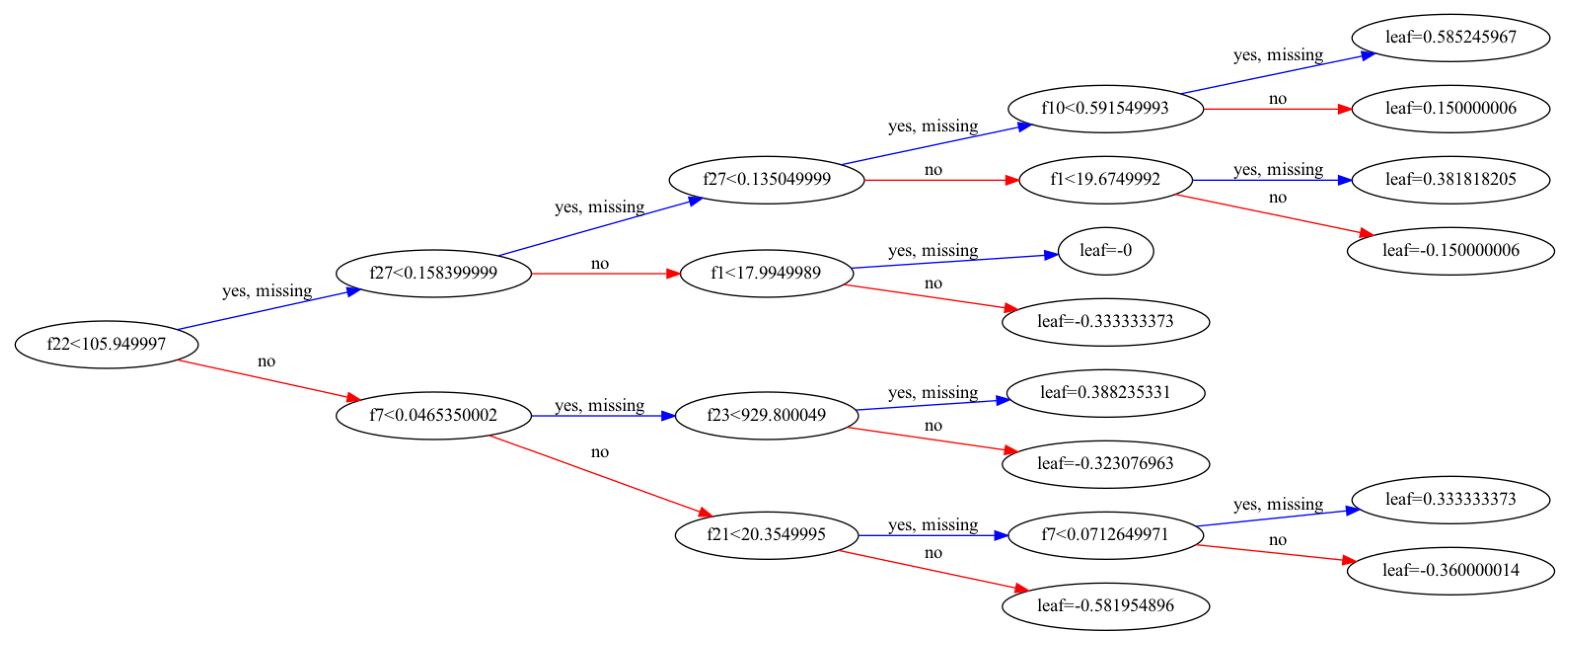

In [31]:
print('Feature Importances:')
print(best_model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
best_model.get_booster().feature_names = feature_data.feature_names
best_model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(best_model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(best_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()